[View in Colaboratory](https://colab.research.google.com/github/aayushkumarjvs/deep-learning-with-python-notebooks/blob/master/3_5classifying_movie_reviews.ipynb)

In [1]:
#!/usr/bin/env python3 
!pip install -q keras   # This only required for Google's Colab
import keras
keras.__version__


Using TensorFlow backend.


'2.1.5'

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 7s 0us/step


In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [0]:
word_index = imdb.get_word_index()             #dict mapping of words to index values repectively

reverse_word_index =  dict([(value, key) for (key, value) in word_index.items()])                 #similarly revrse mapping of index values to words

#Note we are decoding the reviews by an offset of 3, as 0,1,2 are are revesed for "padding","start if sequence" and "unknown"

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [10]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Creating all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

In [0]:
#Traning data
x_train = vectorize_sequences(train_data)
#Test data
x_test = vectorize_sequences(test_data)

In [15]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
#Vectorizing labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
from keras import layers
from keras import models

model = models.Sequential()
#Creating 3 dense layers to vectorize our word and get their respective labels
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]


In [0]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [22]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/50
15000/15000 [==============================] - 1s 96us/step - loss: 0.6057 - acc: 0.7049 - val_loss: 0.3241 - val_acc: 0.8722
Epoch 2/50
15000/15000 [==============================] - 2s 105us/step - loss: 0.3311 - acc: 0.8631 - val_loss: 0.3342 - val_acc: 0.8587
Epoch 3/50
15000/15000 [==============================] - 2s 105us/step - loss: 0.2331 - acc: 0.9057 - val_loss: 0.7210 - val_acc: 0.7346
Epoch 4/50
15000/15000 [==============================] - 2s 105us/step - loss: 0.2409 - acc: 0.9015 - val_loss: 0.2924 - val_acc: 0.8892
Epoch 5/50
15000/15000 [==============================] - 2s 105us/step - loss: 0.1741 - acc: 0.9333 - val_loss: 0.5519 - val_acc: 0.8217
Epoch 6/50
15000/15000 [==============================] - 2s 105us/step - loss: 0.1392 - acc: 0.9498 - val_loss: 0.4007 - val_acc: 0.8799
Epoch 7/50
15000/15000 [==============================] - 2s 105us/step - loss: 0.1422 - acc: 0.9523 - val_loss: 0.3891 - v

15000/15000 [==============================] - 2s 106us/step - loss: 0.0937 - acc: 0.9700 - val_loss: 0.5134 - val_acc: 0.8800
Epoch 10/50
15000/15000 [==============================] - 2s 108us/step - loss: 0.1011 - acc: 0.9756 - val_loss: 0.5325 - val_acc: 0.8775
Epoch 11/50
15000/15000 [==============================] - 2s 106us/step - loss: 0.1212 - acc: 0.9748 - val_loss: 0.5210 - val_acc: 0.8757
Epoch 12/50
15000/15000 [==============================] - 2s 106us/step - loss: 0.0087 - acc: 0.9986 - val_loss: 0.6494 - val_acc: 0.8754
Epoch 13/50
15000/15000 [==============================] - 2s 105us/step - loss: 0.0037 - acc: 0.9995 - val_loss: 0.7562 - val_acc: 0.8758
Epoch 14/50
15000/15000 [==============================] - 2s 105us/step - loss: 0.1547 - acc: 0.9827 - val_loss: 0.7371 - val_acc: 0.8675
Epoch 15/50
15000/15000 [==============================] - 2s 106us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.8132 - val_acc: 0.8710
Epoch 16/50
15000/15000 [==============

15000/15000 [==============================] - 2s 106us/step - loss: 0.1453 - acc: 0.9807 - val_loss: 0.9643 - val_acc: 0.8686
Epoch 19/50
15000/15000 [==============================] - 2s 109us/step - loss: 1.1919e-04 - acc: 1.0000 - val_loss: 0.9878 - val_acc: 0.8699
Epoch 20/50
15000/15000 [==============================] - 2s 107us/step - loss: 5.5419e-05 - acc: 1.0000 - val_loss: 1.0161 - val_acc: 0.8703
Epoch 21/50
15000/15000 [==============================] - 2s 108us/step - loss: 3.4050e-05 - acc: 1.0000 - val_loss: 1.0548 - val_acc: 0.8707
Epoch 22/50
15000/15000 [==============================] - 2s 109us/step - loss: 1.8013e-05 - acc: 1.0000 - val_loss: 1.1114 - val_acc: 0.8702
Epoch 23/50
15000/15000 [==============================] - 2s 107us/step - loss: 7.6319e-06 - acc: 1.0000 - val_loss: 1.1704 - val_acc: 0.8712
Epoch 24/50
15000/15000 [==============================] - 2s 107us/step - loss: 2.0012e-06 - acc: 1.0000 - val_loss: 1.2229 - val_acc: 0.8715
Epoch 25/50
150

15000/15000 [==============================] - 2s 106us/step - loss: 1.2696e-07 - acc: 1.0000 - val_loss: 1.3795 - val_acc: 0.8710
Epoch 28/50
15000/15000 [==============================] - 2s 107us/step - loss: 1.1384e-07 - acc: 1.0000 - val_loss: 1.4082 - val_acc: 0.8705
Epoch 29/50
15000/15000 [==============================] - 2s 108us/step - loss: 1.1083e-07 - acc: 1.0000 - val_loss: 1.4249 - val_acc: 0.8705
Epoch 30/50
15000/15000 [==============================] - 2s 110us/step - loss: 1.1010e-07 - acc: 1.0000 - val_loss: 1.4337 - val_acc: 0.8704
Epoch 31/50
15000/15000 [==============================] - 2s 109us/step - loss: 1.0986e-07 - acc: 1.0000 - val_loss: 1.4387 - val_acc: 0.8701
Epoch 32/50
15000/15000 [==============================] - 2s 109us/step - loss: 1.0974e-07 - acc: 1.0000 - val_loss: 1.4443 - val_acc: 0.8705
Epoch 33/50
15000/15000 [==============================] - 2s 109us/step - loss: 1.0968e-07 - acc: 1.0000 - val_loss: 1.4470 - val_acc: 0.8702
Epoch 34/50

15000/15000 [==============================] - 2s 106us/step - loss: 1.0961e-07 - acc: 1.0000 - val_loss: 1.4525 - val_acc: 0.8700
Epoch 37/50
15000/15000 [==============================] - 2s 108us/step - loss: 1.0960e-07 - acc: 1.0000 - val_loss: 1.4540 - val_acc: 0.8703
Epoch 38/50
15000/15000 [==============================] - 2s 107us/step - loss: 1.0960e-07 - acc: 1.0000 - val_loss: 1.4551 - val_acc: 0.8703
Epoch 39/50
15000/15000 [==============================] - 2s 106us/step - loss: 1.0958e-07 - acc: 1.0000 - val_loss: 1.4562 - val_acc: 0.8703
Epoch 40/50
15000/15000 [==============================] - 2s 107us/step - loss: 1.0958e-07 - acc: 1.0000 - val_loss: 1.4568 - val_acc: 0.8701
Epoch 41/50
15000/15000 [==============================] - 2s 106us/step - loss: 1.0957e-07 - acc: 1.0000 - val_loss: 1.4579 - val_acc: 0.8704
Epoch 42/50
15000/15000 [==============================] - 2s 105us/step - loss: 1.0957e-07 - acc: 1.0000 - val_loss: 1.4589 - val_acc: 0.8705
Epoch 43/50

15000/15000 [==============================] - 2s 105us/step - loss: 1.0956e-07 - acc: 1.0000 - val_loss: 1.4613 - val_acc: 0.8704
Epoch 46/50
15000/15000 [==============================] - 2s 105us/step - loss: 1.0956e-07 - acc: 1.0000 - val_loss: 1.4618 - val_acc: 0.8705
Epoch 47/50
15000/15000 [==============================] - 2s 106us/step - loss: 1.0956e-07 - acc: 1.0000 - val_loss: 1.4627 - val_acc: 0.8704
Epoch 48/50
15000/15000 [==============================] - 2s 106us/step - loss: 1.0956e-07 - acc: 1.0000 - val_loss: 1.4634 - val_acc: 0.8704
Epoch 49/50
15000/15000 [==============================] - 2s 107us/step - loss: 1.0956e-07 - acc: 1.0000 - val_loss: 1.4639 - val_acc: 0.8707
Epoch 50/50
15000/15000 [==============================] - 2s 106us/step - loss: 1.0955e-07 - acc: 1.0000 - val_loss: 1.4641 - val_acc: 0.8706


In [23]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

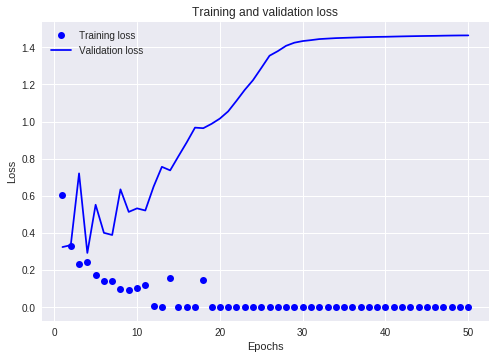

In [24]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

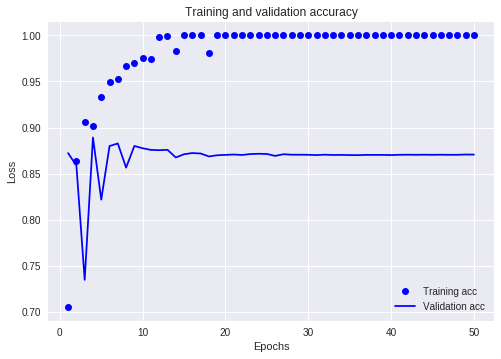

In [25]:
plt.clf()   # clf - clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [29]:
model.fit(x_train, y_train, epochs=10, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/10
25000/25000 [==============================] - 2s 77us/step - loss: 0.1492 - acc: 0.9482
Epoch 2/10
25000/25000 [==============================] - 2s 77us/step - loss: 0.1278 - acc: 0.9570
Epoch 3/10
25000/25000 [==============================] - 2s 78us/step - loss: 0.1141 - acc: 0.9607
Epoch 4/10
25000/25000 [==============================] - 2s 78us/step - loss: 0.0981 - acc: 0.9676
Epoch 5/10
25000/25000 [==============================] - 2s 77us/step - loss: 0.0881 - acc: 0.9707
Epoch 6/10
25000/25000 [==============================] - 2s 76us/step - loss: 0.0750 - acc: 0.9760
Epoch 7/10
25000/25000 [==============================] - 2s 77us/step - loss: 0.0667 - acc: 0.9792
Epoch 8/10
25000/25000 [==============================] - 2s 78us/step - loss: 0.0567 - acc: 0.9827
Epoch 9/10
 9728/25000 [==========>...................] - ETA: 1s - loss: 0.0392 - acc: 0.9906

25000/25000 [==============================] - 2s 76us/step - loss: 0.0467 - acc: 0.9866
Epoch 10/10
25000/25000 [==============================] - 1s 58us/step


In [32]:
results          #This is not that good accuracy becuase we are just using word-vectorisation approach

[0.5732082615303993, 0.8556]

In [33]:
model.predict(x_test)

array([[0.17618977],
       [0.9999976 ],
       [0.98995787],
       ...,
       [0.14691037],
       [0.03307188],
       [0.95749426]], dtype=float32)